# Mounting the google drive

In [1]:
# Mounting the google drive to get the images

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing useful libraries and data reading

In [6]:
# Importing useful libraries

import numpy as np # For numerical computations
import pandas as pd # For dataframe related tasks

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To remove unneccesary warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans # For clustering

In [3]:
# Specifying the location for all our data is located

data_folder_path = 'drive/MyDrive/AI_project_data/'

In [5]:
# Reading the data

df = pd.read_csv(data_folder_path + 'customer_data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Lets see the shape of our data

df.shape

(200, 5)

In [8]:
# Lets see if there is any null value

df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Clustering

In [11]:
# Lets choose the Annual income and Spending score column for clustering

X = df.iloc[:,[3,4]].values
X.shape

(200, 2)

In [12]:
# Now lets choose the number of clusters using WCSS
# WCSS = Within Cluster Sum of Squares

WCSS = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,
                  init='k-means++',
                  random_state=1
                  )
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

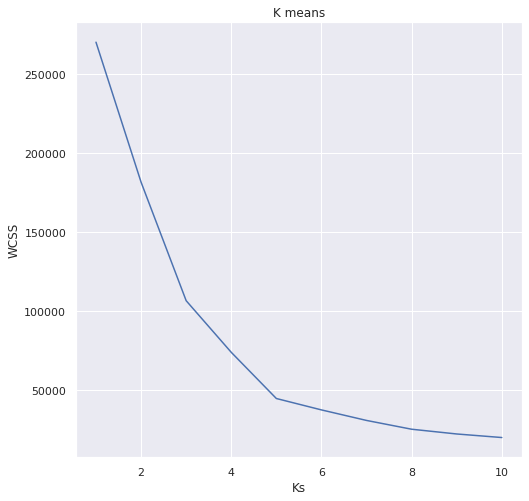

In [14]:
# Now lets plot the WCSS to choose the better k

sns.set()
plt.figure(figsize=(8,8))
plt.plot(range(1,11),WCSS)
plt.title('K means')
plt.xlabel('Ks')
plt.ylabel('WCSS')
plt.show()

From the above we can see that k = 5 is the best k value for our KMeans

In [17]:
# Now that we get k = 5 lets create our kmeans function

kmeans = KMeans(
                n_clusters=5,
                init='k-means++',
                random_state=1
                )

# Predicting the cluster

In [20]:
# Lets label all our X into Y which is cluster

Y = kmeans.fit_predict(X)
Y

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

# Plotting the clusters

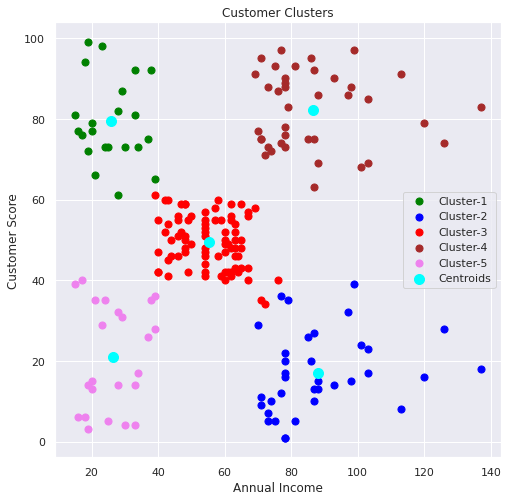

In [30]:
# Lets see the clusters using scatter plot

plt.figure(figsize=(8,8)) # Assigning figure size

# Plotting all the 5 clusters
plt.scatter(X[Y==0,0],X[Y==0,1], s = 50, c='green',label='Cluster-1')
plt.scatter(X[Y==1,0],X[Y==1,1], s = 50, c='blue',label='Cluster-2')
plt.scatter(X[Y==2,0],X[Y==2,1], s = 50, c='red',label='Cluster-3')
plt.scatter(X[Y==3,0],X[Y==3,1], s = 50, c='brown',label='Cluster-4')
plt.scatter(X[Y==4,0],X[Y==4,1], s = 50, c='violet',label='Cluster-5')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=100,
            c='cyan',
            label='Centroids')

# Adding title and legends
plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Customer Score')
plt.legend()
plt.show()